# Ornstein-Uhlenbeck Process Parameter Estimation

The Ornstein-Uhlenbeck SDE is used to model mean reverting processes and is defined by,

$
\begin{align}
dX_t = \lambda \left( \mu - X_t \right) dt + \sigma dB_t
\end{align}
$

where $dB_t \sim \text{Normal}(0, dt)$. The solution is given by,

$
\begin{align}
X_t = X_0 e^{-\lambda t} + \mu\left( 1 - e^{-\lambda t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)} \hspace{5pt} \varepsilon_t \hspace{30pt}
\end{align}
$

Assume $X_t$ is known. If follows that for $t+\Delta t$,

$
\begin{align}
X_{t+\Delta t} =  X_t e^{-\lambda \Delta t} + \mu \left( 1 - e^{-\lambda \Delta t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda \Delta t} \right)} \hspace{5pt} \varepsilon_t
\end{align}
$

Now, $\text{AR}(1)$ with constant offset is given by,

$
\begin{align}
X_t = \hat{\varphi} X_{t-1} + \hat{\mu} + \hat{\sigma} \varepsilon_t
\end{align}
$

Comparing with the previous equation gives,

$
\begin{align}
&\hat{\varphi} = e^{-\lambda \Delta t} \\
&\hat{\mu} = \mu \left(1 - e^{-\lambda \Delta t} \right) \\
&\hat{\sigma}^2 = \frac{\sigma^2}{2\lambda}\left(1 - e^{-2\lambda \Delta t}\right)
\end{align}
$

OLS can be used to determine $\hat{\varphi}$, $\hat{\mu}$ and $\hat{\sigma}$ from the available data. Then $\lambda$ is given by,

$
\begin{align}
\lambda = - \frac{\ln{\hat{\varphi}}}{\Delta t}
\end{align}
$

Substitution into the equation for $\mu$ gives,

$
\begin{align}
\mu = \frac{\hat{\mu}}{1 - \hat{\varphi}}
\end{align}
$

and

$
\begin{align}
\sigma^2 = \frac{2\lambda\hat{\sigma}^2}{1 - \hat{\varphi}^2}
\end{align}
$

The errors for the Ornstein-Uhlenbeck parameters in terms of the $\text{AR}(1)$ errors are given by,

$
\begin{align}
&\Delta_\lambda = -\frac{1}{\hat{\varphi}\Delta t}\Delta_\hat{\varphi} \\
&\Delta_\mu = \frac{\hat{\mu}}{\left(1-\hat{\varphi}\right)}\Delta_\hat{\varphi} + \frac{1}{1-\hat{\varphi}}\Delta_\hat{\mu} \\
&\Delta_{\sigma^2} = \frac{4\lambda\hat{\varphi}\hat{\sigma}^2}{\left(1 - \hat{\varphi}^2\right)^2}\Delta_\hat{\varphi} + 
                     \frac{2\hat{\sigma}^2}{1 - \hat{\varphi}^2}\Delta_\lambda + \frac{2\lambda}{1 - \hat{\varphi}^2}\Delta_{\hat{\sigma}^2}
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (OU)
from lib import (curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Ornstein-Uhlenbeck Process Parameter Estimation Examples

The Ornstein-Uhlenbeck Process is a model of a mean reverting process. Two parameters assumed known,

* $\Delta t$ the time step length.
* $X_0$ the initial value of the process.

and three estimated parameters,

* $\mu$ the time asymptotic process mean.
* $\lambda$ the time scale of decay to asymptotic mean.
* $\sigma$ the standard deviation of the noise term.


### Large sample size

In [2]:
Δt = 0.01
x0 = 0.0
npts = 10000

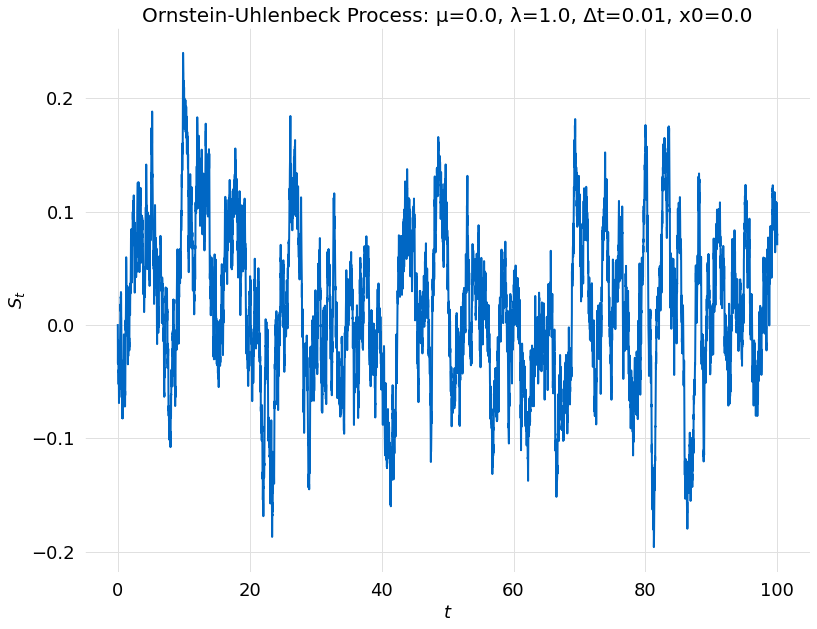

In [3]:
μ = 0.0
λ = 1.0
σ = 1.0
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt, "Δx": Δt}
ou = OU.Source.PROC.create(**params)
curve(ou)